In [1]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
1e13, # Base electron jump rate
-0.7, # Fermi level (eV)
0.071, # Intrinsic semiconductor's gaussian width (eV)
0.07, # Doping states' gaussian width (eV)
);
F = -5.3e4;
T = 300;

In [2]:
range = -15:0.5:15;
res = (x -> Conduction.xf(semiconductor, x, T, F)).(range)

61-element Array{Float64,1}:
 0.1254061779940343
 0.1254053603263278
 0.12540446432729235
 0.12539179060105926
 0.1254061106824228
 0.12540672548006562
 0.12540598614299112
 0.1254081971663365
 0.12540675921366562
 0.1254061868449512
 0.12540516398587548
 0.12536130304680104
 0.12539551736012017
 ⋮
 0.0008953373353100589
 0.0005835489209204345
 0.0003689766752488265
 0.00022617733160183493
 0.00013438866994946574
 7.732671757247498e-5
 4.308707309990092e-5
 2.324813064332912e-5
 1.2144491935814788e-5
 6.141967231353637e-6
 3.0070207846556676e-6
 1.4250608098641233e-6

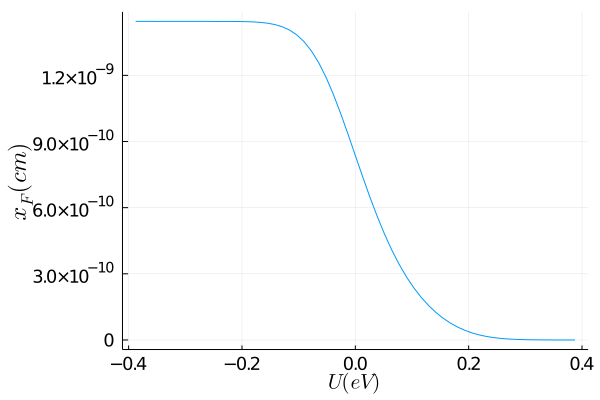

In [9]:
plot(range .* ((Conduction.k * T) / (1.602e-19)), res ./ (2 * semiconductor.alpha), xlabel=L"U (eV)", ylabel=L"x_F (cm)", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [8]:
range = -15:0.5:15;

function I1(x)
    R = Conduction.RnnVRH(semiconductor, x, T, F);
    return Conduction.I1(x, T, semiconductor, R, F)
end

res_I1 = I1.(range);

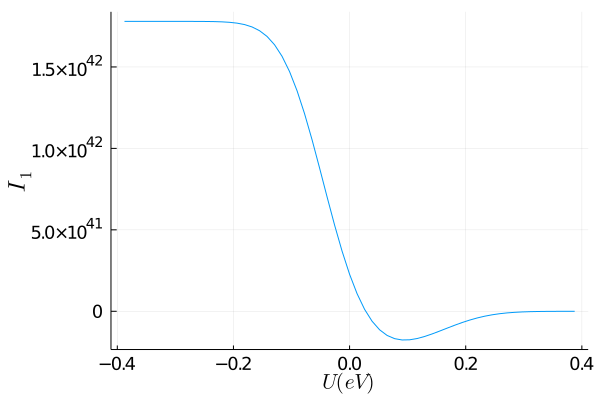

In [9]:
plot( range .* ((Conduction.k * T) / (1.602e-19)), res_I1,  xlabel=L"U (eV)", ylabel=L"I_1", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [10]:
function I2(x)
    R = Conduction.RnnVRH(semiconductor, x, T, F);
    return Conduction.I2(x, T, semiconductor, R, F)
end

res_I2 = I2.(range);

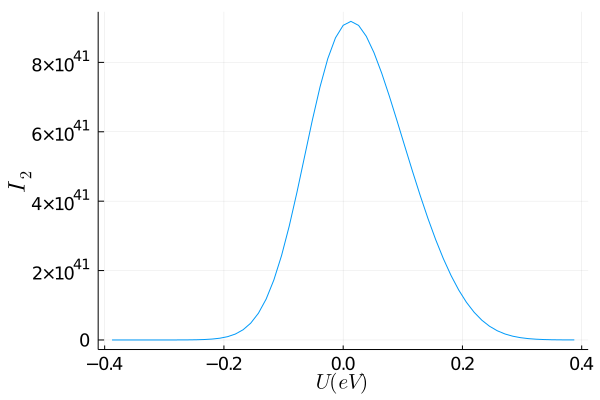

In [12]:
plot( range .* ((Conduction.k * T) / (1.602e-19)), res_I2,  xlabel=L"U (eV)", ylabel=L"I_2", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)